Lenght of our Training data: (712, 4) 
Length of our Testing data: (179, 4)
Accuracy Score: 0.782123
F1 Score: 0.677686
Precision Score: 0.694915
In other words, when the model predicts someone survived, it is correct 0.694915 of the time.
Recall Score: 0.661290
In other words, it correctly identifies 0.661290 percent of all survivors
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.69      0.66      0.68        62

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



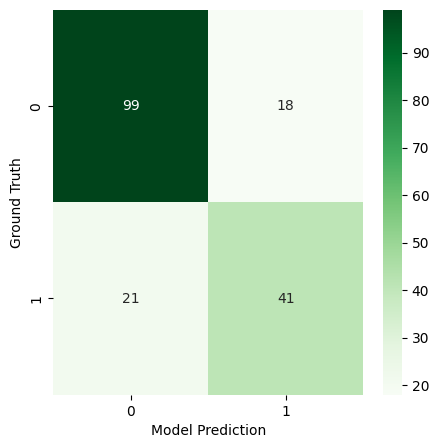

In [ ]:
# Import our libraries

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    f1_score,
)


# Load data
df = pd.read_csv("data/titanic.csv")

# Convert categorical to numerical
df = pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)


# Select the dependent and independent features
selected_features = ["fare", "pclass_2", "pclass_3", "sex_male"]
X = df[selected_features]
y = df["survived"]


# Split your data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(
    "Lenght of our Training data:",
    X_train.shape,
    "\nLength of our Testing data:",
    X_test.shape,
)


# Initalize our model.
model = LogisticRegression()

# Train your model on the training data
model.fit(X=X_train, y=y_train)

# Make predicitions on the testing data
y_pred = model.predict(X_test)


# Evaulate our model

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 SCORE
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")
plt.ylabel("Ground Truth")
plt.xlabel("Model Prediction")

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print(
    "In other words, when the model predicts someone survived, it is correct %f of the time."
    % precision
)


recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)


# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
# WHY ARE PRECISION AND RECALL SCORES DIFFERENT IN CLASSFICIATION REPORT ???

# We are only seeing the values for class 1 in the precision_score(), recall_score(), and f1_score() calls,
# while the classification_report() shows metrics for both classes (i.e., class 0 and class 1).
# These functions recision_score(), recall_score(), and f1_score(), by default, compute metrics for the positive class, which is the label 1 (i.e., pos_label=1).

# If you want the precision/recall/F1 for class 0, you can explicitly set:
# precision_score(y_test, y_pred, pos_label=0)
# recall_score(y_test, y_pred, pos_label=0)